In [ ]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

# List packages and versions
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
scipy: 1.13.1
numpy: 1.26.4
matplotlib: 3.10.0
pandas: 2.2.2
sklearn: 1.6.1


In [ ]:
# Import data handling libraries
import numpy as np
import pandas as pd

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [ ]:
# Load dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)
df.head(3)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [ ]:
# Preprocess the data
df.replace('?',-99999, inplace=True)
print(df.axes)
df.drop(['id'], axis=1, inplace=True)
df.head(3)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2


       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


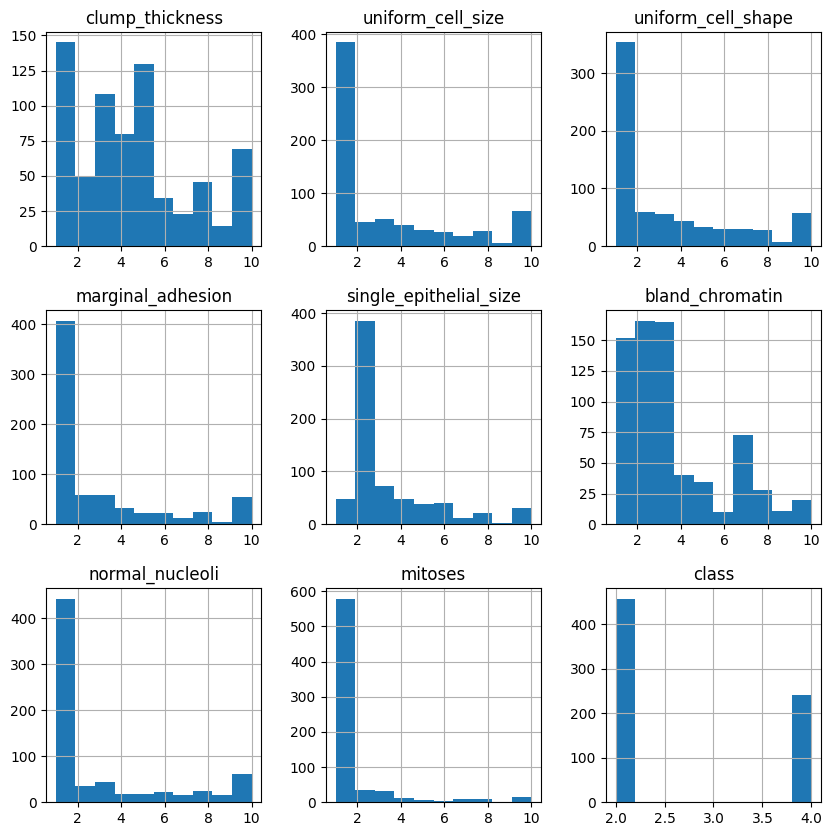

In [ ]:
# Describe the dataset
print(df.describe())

# Plot histogram for each variable
df.hist(figsize = (10,10))
plt.show()

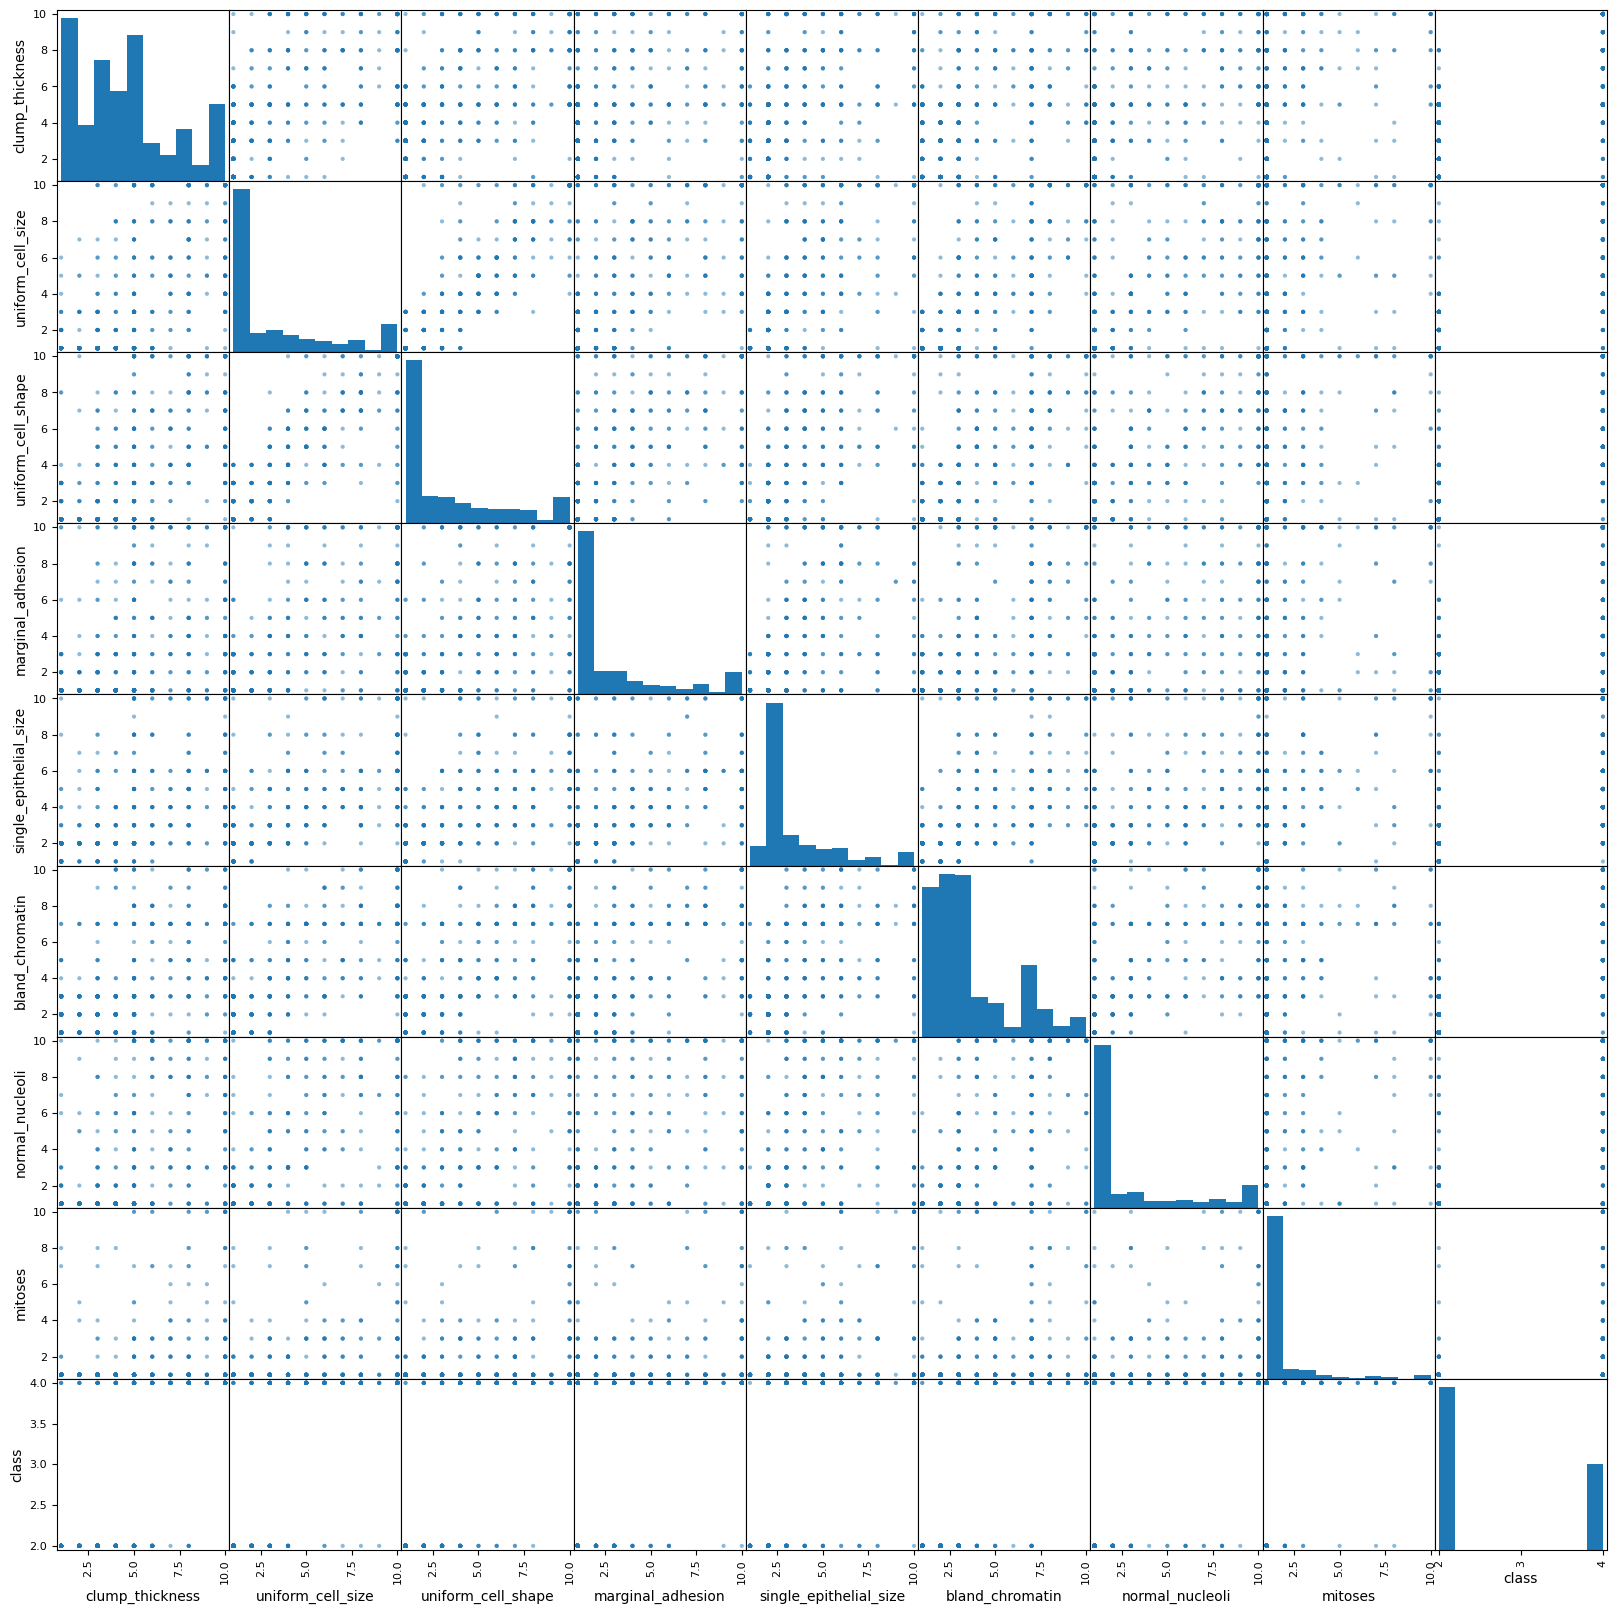

In [ ]:
# Create scatter plot matrix
scatter_matrix(df, figsize=(20,20))
plt.show()

In [ ]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [31]:
# Testing Options
seed = 8
scoring = 'accuracy'

# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC(kernel='linear')))

results = []
names = []

for name, model in models:

    model.fit(X_train, y_train)

    test_predictions = model.predict(X_test)
    print(f"{name} - Test Classification Report:")
    print(classification_report(y_test, test_predictions, zero_division=1))

    val_predictions = model.predict(X_val)
    print(f"{name} - Validation Classification Report:")
    print(classification_report(y_val, val_predictions, zero_division=1))

KNN - Test Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.95      0.96        99
           4       0.89      0.95      0.92        41

    accuracy                           0.95       140
   macro avg       0.93      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140

KNN - Validation Classification Report:
              precision    recall  f1-score   support

           2       0.99      1.00      0.99        96
           4       1.00      0.98      0.99        44

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

SVM - Test Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.93      0.95        99
           4       0.85      0.95      0.90        41

    accuracy                           0.94       140
   macro avg       0